## Libraries

In [108]:
import pandas as pd
import numpy as np
from flatten_json import flatten
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## Data import

In [109]:
with open('Telco-Customer-Churn.json') as file:
    data = json.load(file)

In [110]:
dict_flatten = (flatten(d) for d in data)

In [111]:
dict_flatten

<generator object <genexpr> at 0x000001E2002759C8>

In [112]:
df_telco = pd.DataFrame(dict_flatten)

In [113]:
df_telco.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Data dictionary
- customerID: unique identification number of each customer
- Churn: Whether or not the customer left the company
- gender: gender (male and female)
- SeniorCitizen: information about whether or not a customer is 65 years of age or older
- Partner: whether or not the customer has a partner or partner
- Dependents: whether or not the customer has dependents
- tenure: months of customer contract
- PhoneService: phone service subscription
- MultipleLines: subscription to more than one phone line
- InternetService: subscription to an internet provider
- OnlineSecurity: Additional online security subscription
- OnlineBackup: additional online backup subscription
- DeviceProtection: Additional protection subscription on the device
- TechSupport: Additional Technical Support Subscription, Less Waiting Time
- StreamingTV: cable TV subscription
- StreamingMovies: movie streaming subscription
- Contract: type of contract
- PaperlessBilling: if the customer prefers to receive the invoice online
- PaymentMethod: payment method
- Charges.Monthly: Total of all customer services per month
- Charges.Total: total spent by the customer

## Data Cleaning
- Useless columns
- Data kind definition
    - Null values
    - Missing Analysis (%)
        - Fill missings?
- Duplicated column
- Duplicated rows
- Constant columns
- Feature Analysis
    - Outlier analysis
- Data export

In [114]:
#describe
df_telco.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_SeniorCitizen,7267.0,0.162653,0.369074,0.00,0.000,0.0,0.000,1.00
customer_tenure,7267.0,32.346498,24.571773,0.00,9.000,29.0,55.000,72.00
account_Charges_Monthly,7267.0,64.720098,30.129572,18.25,35.425,70.3,89.875,118.75


### Useless columns

In [115]:
df_telco.head(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [116]:
df_telco.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

### Data kind definition

In [117]:
df_telco['customerID'].value_counts().count()

7267

In [118]:
df_telco.head(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [119]:
df_telco.info()
#Inconsistences: "customer_SeniorCitizen" numeric
#Inconsistences: "account_Charges_Total" object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [120]:
# Transform df_telco['customer_SeniorCitizen'] from numeric to object
df_telco['customer_SeniorCitizen'] = df_telco['customer_SeniorCitizen'].replace([0], '< 65 years' ) 
df_telco['customer_SeniorCitizen'] = df_telco['customer_SeniorCitizen'].replace([1], '>= 65 years' ) 

In [121]:
# Transform df_telco['account_Charges_Total'] from object to numeric
df_telco['account_Charges_Total'] = pd.to_numeric(df_telco['account_Charges_Total'],errors = 'coerce')

In [122]:
df_telco.info()
# account_Charges_Total null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   object 
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [123]:
df_telco['account_Charges_Total'].isnull().sum()*100/len(df_telco)
#0.15% of NaN, so we can drop it

0.15136920324755745

In [124]:
#drop df_telco['account_Charges_Total'].isnull()
df_telco.drop(df_telco[df_telco['account_Charges_Total'].isnull()].index, inplace = True)

In [125]:
# Analysis of unique values
print('DataFrame lenght:', len(df_telco))
print('')
for column in df_telco:
    print('Unique values of', column, ':', df_telco[column].value_counts().count())
    print(df_telco[column].unique())
    print('---')
    
# There is an inconsistence with Chun == ''

DataFrame lenght: 7256

Unique values of customerID : 7256
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
---
Unique values of Churn : 3
['No' 'Yes' '']
---
Unique values of customer_gender : 2
['Female' 'Male']
---
Unique values of customer_SeniorCitizen : 2
['< 65 years' '>= 65 years']
---
Unique values of customer_Partner : 2
['Yes' 'No']
---
Unique values of customer_Dependents : 2
['Yes' 'No']
---
Unique values of customer_tenure : 72
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42]
---
Unique values of phone_PhoneService : 2
['Yes' 'No']
---
Unique values of phone_MultipleLines : 3
['No' 'Yes' 'No phone service']
---
Unique values of internet_InternetService : 3
['DSL' 'Fiber optic' 'No']
---
Unique values of internet_OnlineSecurity : 3
['No' 'Yes' 'No internet service']
---

In [126]:
len(df_telco.loc[df_telco['Churn'] == ''])*100/len(df_telco)
# 3.08% of the data has churn undefined, so we can drop it

3.08710033076075

In [127]:
#drop churn undefined
df_telco.drop(df_telco[df_telco['Churn'] == ''].index, inplace = True)

In [128]:
# Replace Churn No, Yes by 0, 1 to use as target in a classification model
df_telco['Churn'] = df_telco['Churn'].replace(['No'], 0)
df_telco['Churn'] = df_telco['Churn'].replace(['Yes'], 1)

In [129]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   object 
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   objec

### Duplicated rows

In [130]:
if (df_telco.duplicated() == False).sum() == len(df_telco):
    print("There isn't any duplicated row")
else:
    print("There are duplicated rows")

There isn't any duplicated row


### Duplicated columns

In [131]:
if (df_telco.T.duplicated() == False).sum() == len(df_telco.T):
    print("There isn't any duplicated column")
else:
    print("There are duplicated columns")

There isn't any duplicated column


### Constant columns

In [132]:
df_telco.describe().T
# There isn't any constant column

,count,mean,std,min,25%,50%,75%,max
Churn,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00
customer_tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
account_Charges_Monthly,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
account_Charges_Total,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


### Feature analysis

C:\Users\stesl\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'customer_tenure'}>],
       [<AxesSubplot:title={'center':'account_Charges_Monthly'}>,
        <AxesSubplot:title={'center':'account_Charges_Total'}>]],
      dtype=object)

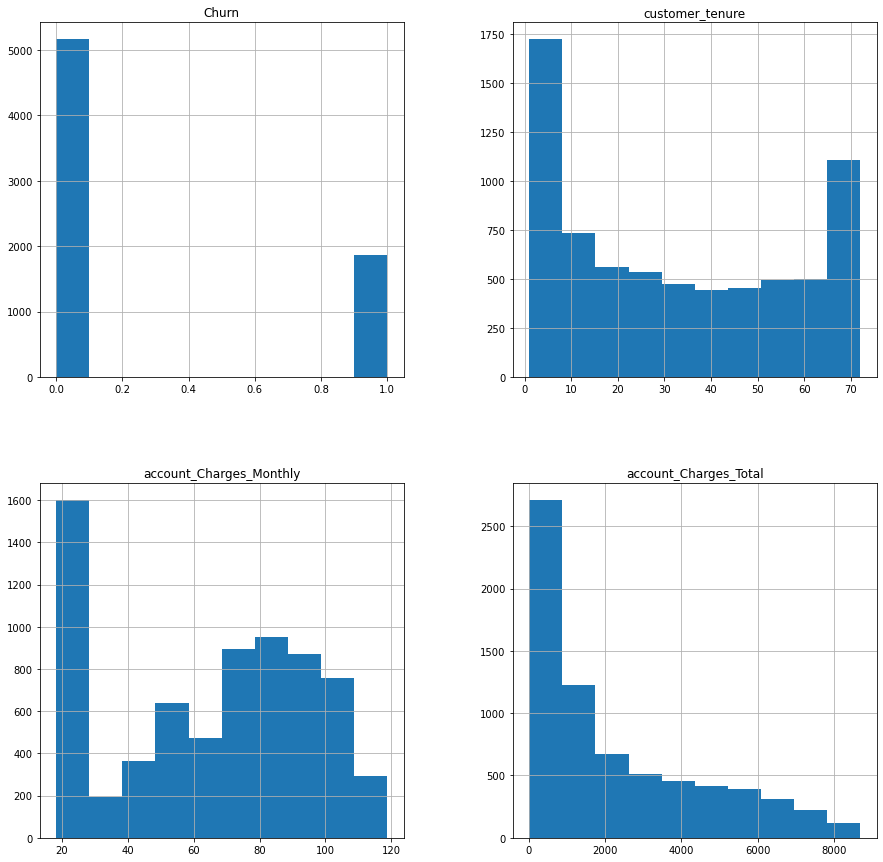

In [133]:
# Histogram for numeric features
df_telco.hist(figsize=(15,15))

In [134]:
# Categorical features
list_cat = ['customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod']

In [135]:
#analysing categorical features
for column in list_cat:
  print(column)
  print()
  print(df_telco[column].value_counts(normalize = True))

customer_gender

Male      0.504693
Female    0.495307
Name: customer_gender, dtype: float64
customer_SeniorCitizen

< 65 years     0.8376
>= 65 years    0.1624
Name: customer_SeniorCitizen, dtype: float64
customer_Partner

No     0.517491
Yes    0.482509
Name: customer_Partner, dtype: float64
customer_Dependents

No     0.701507
Yes    0.298493
Name: customer_Dependents, dtype: float64
phone_PhoneService

Yes    0.903299
No     0.096701
Name: phone_PhoneService, dtype: float64
phone_MultipleLines

No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: phone_MultipleLines, dtype: float64
internet_InternetService

Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: internet_InternetService, dtype: float64
internet_OnlineSecurity

No                     0.497298
Yes                    0.286547
No internet service    0.216155
Name: internet_OnlineSecurity, dtype: float64
internet_OnlineBackup

No                     0.438993


customer_gender


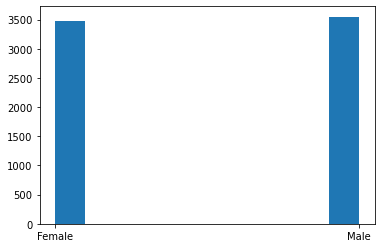

customer_SeniorCitizen


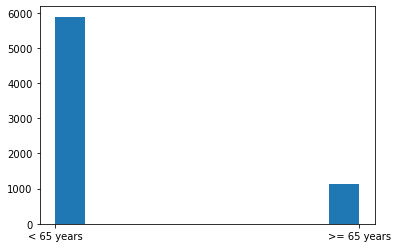

customer_Partner


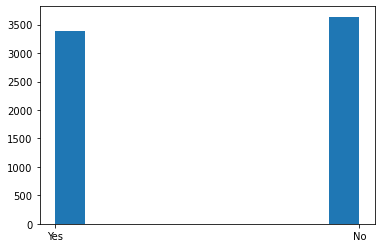

customer_Dependents


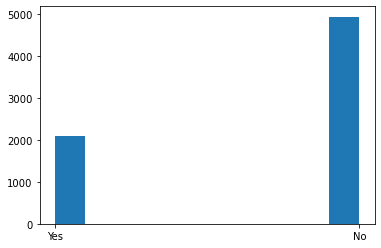

phone_PhoneService


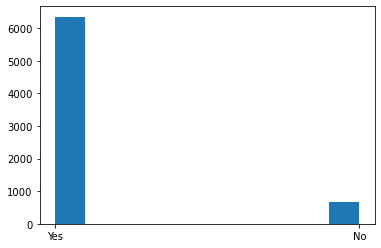

phone_MultipleLines


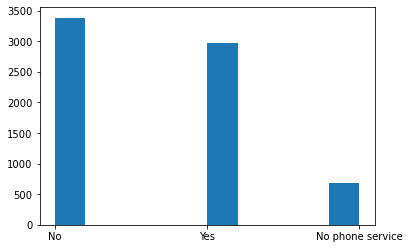

internet_InternetService


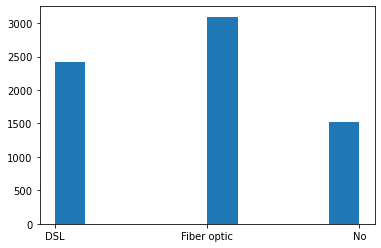

internet_OnlineSecurity


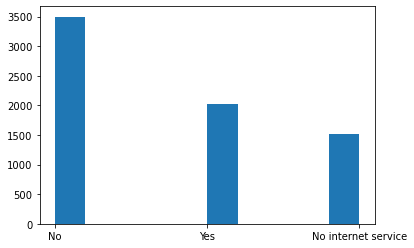

internet_OnlineBackup


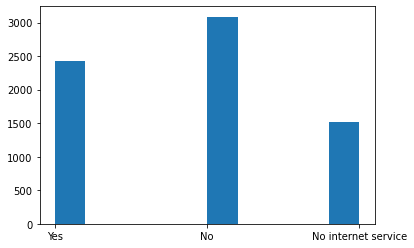

internet_DeviceProtection


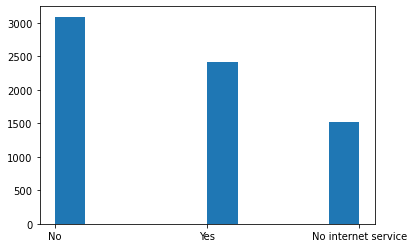

internet_TechSupport


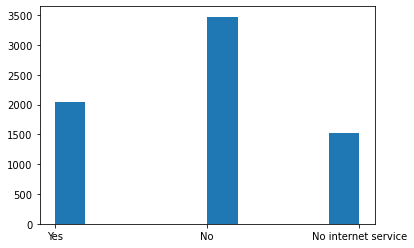

internet_StreamingTV


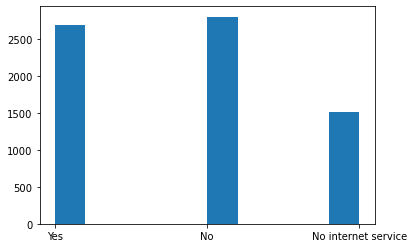

internet_StreamingMovies


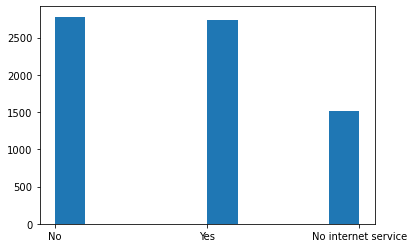

account_Contract


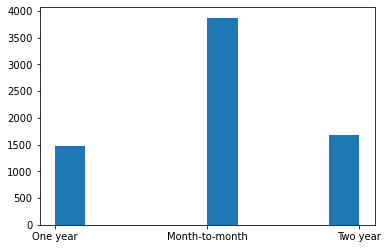

account_PaperlessBilling


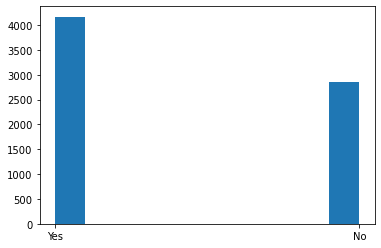

account_PaymentMethod


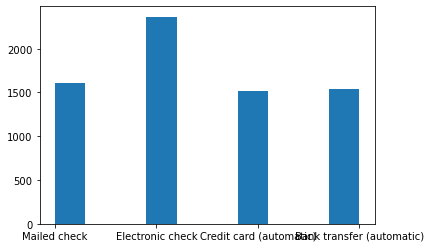

In [136]:
%matplotlib inline 
# Histogram for categorical features
for item in list_cat:
  print(item)
  plt.hist(df_telco[item])
  plt.show()

In [137]:
list_num = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total']

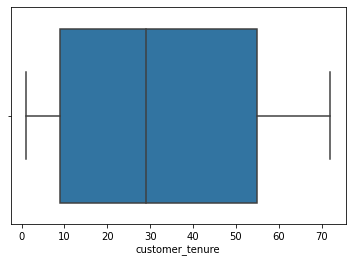

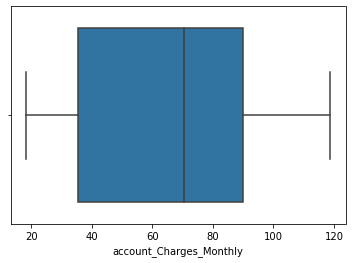

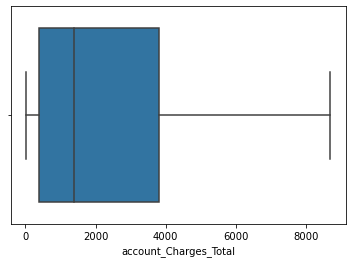

In [138]:
for feature in list_num:
    sns.boxplot(x = df_telco[feature])
    plt.show()
#seems that there are outliers in account_Charges_Total

In [139]:
# Outlier analysis of account_Charges_Total

# First quartile (Q1)
Q1 = np.percentile(df_telco['account_Charges_Total'], 25, interpolation = 'midpoint')
print('Q1',Q1)
# Third quartile (Q3)
Q3 = np.percentile(df_telco['account_Charges_Total'], 75, interpolation = 'midpoint')
print('Q3',Q3)
IQR = Q3 - Q1
print('IQR',IQR)

Q1 401.4
Q3 3794.975
IQR 3393.575


In [140]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit: ', low_lim)
print('up_limit:', up_lim)

low_limit:  -4688.9625
up_limit: 8885.3375


In [141]:
df_telco.loc[df_telco['account_Charges_Total'] < low_lim]

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total


In [142]:
df_telco.loc[df_telco['account_Charges_Total'] > up_lim]
# There aren't outliers in this feature

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total


In [143]:
df_telco.head(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,0,Female,< 65 years,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,< 65 years,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,< 65 years,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,>= 65 years,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,>= 65 years,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [144]:
df_telco['account_Charges_Daily'] = round(df_telco['account_Charges_Monthly']/30 , 2)

In [145]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   object 
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   objec

### Data export

In [146]:
df_telco.to_csv('df_telco_clean.csv', index = False)